# KQL magic in Azure Data Studio

_Last updated: Oct 15, 2020_  
_Compatible with Azure Data Studio v1.23.0 | Kqlmagic version 0.1.113post1._

This notebook demonstrates how to load Kqlmagic extension, connect and perform data analysis using Kusto language (KQL) in Azure Data Studio. This demo shows how to connect to an **Azure Data Explorer** cluster, an **Application Insights** log and a **Log Analytics** log, and performs Kusto (KQL) queries. This notebook is pre-executed so that you can see the results of the queries for demo purposes.

More information about the data sources used in this notebook. All these data sources are demo clusters / environments that users with an Azure account can use. 

| Type | Cluster / Dataset Details | Comments |
| --- | --- | --- |
| Azure Data Explorer | Cluster: help; Database: Samples | [Storm Events in ADX Web](https://dataexplorer.azure.com/clusters/help/databases/Samples "https://dataexplorer.azure.com/clusters/help/databases/Samples") |
| Application Insights | DEMO\_APP | Page Views |
| Log Analytics | DEMO\_WORKSPACE | Kubernetes Node Inventory Log |

> **Please provide your feedback [here](https://github.com/microsoft/azuredatastudio/issues/9713 "https://github.com/microsoft/azuredatastudio/issues/9713").**

> **Tip**: In this notebook, you will see a few "popup \[topic\]" in the output. Clicking on this will open a new browser to learn more about the \[topic\].

> **Tip**: Some of the results of the code cells below are saved in this notebook so you can see what the expected Kql query output should look like.

## Pre-requisites

1.  Use Azure Data Studio v.1.17.0 April 2020 release or after ([download](https://docs.microsoft.com/sql/azure-data-studio/download-azure-data-studio "https://docs.microsoft.com/sql/azure-data-studio/download-azure-data-studio")); or Azure Data Studio Insiders build ([downlad](https://github.com/microsoft/azuredatastudio#try-out-the-latest-insiders-build-from-master "https://github.com/microsoft/azuredatastudio#try-out-the-latest-insiders-build-from-master")).
2.  Ensure that Kqlmagic is already installed. See [Install and setup Kqlmagic in a notebook](https://docs.microsoft.com/en-us/sql/azure-data-studio/notebooks/notebooks-kqlmagic?view=sql-server-ver15#install-and-set-up-kqlmagic-in-a-notebook "https://docs.microsoft.com/en-us/sql/azure-data-studio/notebooks/notebooks-kqlmagic?view=sql-server-ver15#install-and-set-up-kqlmagic-in-a-notebook") for more info.

> **Tip**: use the latest non-"dev" version of Kqlmagic if possible, e.g 0.1.113 or 0.1.113post1.  

## Loading Kqlmagic and setting up environment for this demo

### Step 1. Customize output using environment variables (optional)

Here's an example of seme settings that you can use: 

-   KQLMAGIC\_LOAD\_MODE to change the output display when loading kqlmagic
-   KQLMAGIC\_LOAD\_CONFIGURATION to change specific configuration, such as:
    -   display\_lmit = the number of rows that will be displayed, e.g. 100
    -   show\_query\_time =  should query time be displayed, i.e.. True/False
    -   plot\_package = this is the plot package for the `render` syntax.
    -   show\_init\_banner = Kqlmagic by default shows the initial banner with useful information such as the version and more. Users can turn this off by setting to False.  

Below is some example that you can optionally run.

> **Tip:** You'll need to run environment configurations before running loading the Kqlmagic extension.

In [1]:
# Set environment variables using %env magic
%env KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"

# use the following to suppress the Kqlmagic banner:
#%env KQLMAGIC_CONFIGURATION="show_init_banner=False"


env: KQLMAGIC_CONFIGURATION="show_query_time=False;plot_package='plotly';display_limit=100"


### Step 2. Load Kqlmagic

This is a line to load Kqlmagic before you can start using it.


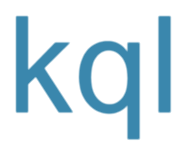

In [2]:
%reload_ext Kqlmagic

## Demo: Using Kqlmagic to connect to Azure Data Explorer

This Azure Data Explorer cluster contains Storm weather datasets.

> **Tip**: Some of the results of the code cells below are saved in this notebook so you can see what the expected Kql query output should look like.

### 1\. Connect to the cluster and authenticate.

This uses Device Login to authenticate. Please copy the code from the output and click on **Copy code to clipboard and authenticate** which will open a browser where you will need to paste the code. Once you authenticate successfully, you can come back to Azure Data Studio to continue with the rest of the script.

> **Tip**: If you are using your own ADX cluster, you must include the region in the connection string as follows:
`%kql azuredataexplorer://code;cluster='mycluster.westus';database='mykustodb'`

In [3]:
%kql azureDataExplorer://code;cluster='help';database='Samples' -try-azcli_login

### 2. Analyze top 10 Storm Events by State and frequency
If you are familiar with Kusto language (KQL), you can simply type the query after <code>%kql</code>.

In [4]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10

,State,count_
0,TEXAS,4701
1,KANSAS,3166
2,IOWA,2337
3,ILLINOIS,2022
4,MISSOURI,2016
5,GEORGIA,1983
6,MINNESOTA,1881
7,WISCONSIN,1850
8,NEBRASKA,1766
9,NEW YORK,1750


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

### 3\. Visualize timechart

Below is an example on using render to visualize dataset. 

> **Tip**: you can use `\` to break to a new line.

In [5]:
%kql StormEvents \
| summarize event_count=count() by bin(StartTime, 1d) \
| render timechart title= 'Daily Storm Events'

[{'StartTime': datetime.datetime(2007, 9, 29, 0, 0, tzinfo=tzutc()), 'event_count': 84},
 {'StartTime': datetime.datetime(2007, 9, 18, 0, 0, tzinfo=tzutc()), 'event_count': 101},
 {'StartTime': datetime.datetime(2007, 9, 20, 0, 0, tzinfo=tzutc()), 'event_count': 148},
 {'StartTime': datetime.datetime(2007, 12, 30, 0, 0, tzinfo=tzutc()), 'event_count': 77},
 {'StartTime': datetime.datetime(2007, 12, 20, 0, 0, tzinfo=tzutc()), 'event_count': 107},
 {'StartTime': datetime.datetime(2007, 12, 28, 0, 0, tzinfo=tzutc()), 'event_count': 131},
 {'StartTime': datetime.datetime(2007, 12, 7, 0, 0, tzinfo=tzutc()), 'event_count': 119},
 {'StartTime': datetime.datetime(2007, 12, 13, 0, 0, tzinfo=tzutc()), 'event_count': 202},
 {'StartTime': datetime.datetime(2007, 12, 23, 0, 0, tzinfo=tzutc()), 'event_count': 273},
 {'StartTime': datetime.datetime(2007, 12, 11, 0, 0, tzinfo=tzutc()), 'event_count': 196},
 {'StartTime': datetime.datetime(2007, 12, 10, 0, 0, tzinfo=tzutc()), 'event_count': 254},
 {'StartTime': datetime.datetime(2007, 12, 15, 0, 0, tzinfo=tzutc()), 'event_count': 405},
 {'StartTime': datetime.datetime(2007, 12, 16, 0, 0, tzinfo=tzutc()), 'event_count': 288},
 {'StartTime': datetime.datetime(2007, 12, 1, 0, 0, tzinfo=tzutc()), 'event_count': 948},
 {'StartTime': datetime.datetime(2007, 12, 9, 0, 0, tzinfo=tzutc()), 'event_count': 188},
 {'StartTime': datetime.datetime(2007, 12, 14, 0, 0, tzinfo=tzutc()), 'event_count': 111},
 {'StartTime': datetime.datetime(2007, 12, 8, 0, 0, tzinfo=tzutc()), 'event_count': 133},
 {'StartTime': datetime.datetime(2007, 12, 27, 0, 0, tzinfo=tzutc()), 'event_count': 99},
 {'StartTime': datetime.datetime(2007, 11, 4, 0, 0, tzinfo=tzutc()), 'event_count': 38},
 {'StartTime': datetime.datetime(2007, 8, 24, 0, 0, tzinfo=tzutc()), 'event_count': 402},
 {'StartTime': datetime.datetime(2007, 8, 3, 0, 0, tzinfo=tzutc()), 'event_count': 371},
 {'StartTime': datetime.datetime(2007, 8, 20, 0, 0, tzinfo=tzutc()), 'event_count': 319},
 {'StartTime': datetime.datetime(2007, 1, 15, 0, 0, tzinfo=tzutc()), 'event_count': 194},
 {'StartTime': datetime.datetime(2007, 11, 5, 0, 0, tzinfo=tzutc()), 'event_count': 73},
 {'StartTime': datetime.datetime(2007, 11, 21, 0, 0, tzinfo=tzutc()), 'event_count': 106},
 {'StartTime': datetime.datetime(2007, 8, 16, 0, 0, tzinfo=tzutc()), 'event_count': 431},
 {'StartTime': datetime.datetime(2007, 8, 25, 0, 0, tzinfo=tzutc()), 'event_count': 397},
 {'StartTime': datetime.datetime(2007, 8, 9, 0, 0, tzinfo=tzutc()), 'event_count': 291},
 {'StartTime': datetime.datetime(2007, 12, 21, 0, 0, tzinfo=tzutc()), 'event_count': 136},
 {'StartTime': datetime.datetime(2007, 8, 6, 0, 0, tzinfo=tzutc()), 'event_count': 209},
 {'StartTime': datetime.datetime(2007, 8, 30, 0, 0, tzinfo=tzutc()), 'event_count': 117},
 {'StartTime': datetime.datetime(2007, 8, 17, 0, 0, tzinfo=tzutc()), 'event_count': 376},
 {'StartTime': datetime.datetime(2007, 8, 4, 0, 0, tzinfo=tzutc()), 'event_count': 70},
 {'StartTime': datetime.datetime(2007, 8, 7, 0, 0, tzinfo=tzutc()), 'event_count': 266},
 {'StartTime': datetime.datetime(2007, 12, 26, 0, 0, tzinfo=tzutc()), 'event_count': 61},
 {'StartTime': datetime.datetime(2007, 11, 14, 0, 0, tzinfo=tzutc()), 'event_count': 91},
 {'StartTime': datetime.datetime(2007, 12, 31, 0, 0, tzinfo=tzutc()), 'event_count': 105},
 {'StartTime': datetime.datetime(2007, 12, 17, 0, 0, tzinfo=tzutc()), 'event_count': 28},
 {'StartTime': datetime.datetime(2007, 8, 19, 0, 0, tzinfo=tzutc()), 'event_count': 211},
 {'StartTime': datetime.datetime(2007, 8, 21, 0, 0, tzinfo=tzutc()), 'event_count': 349},
 {'StartTime': datetime.datetime(2007, 8, 13, 0, 0, tzinfo=tzutc()), 'event_count': 249},
 {'StartTime': datetime.datetime(2007, 2, 24, 0, 0, tzinfo=tzutc()), 'event_count': 1014},
 {'StartTime': datetime.datetime(2007, 11, 28, 0, 0, tzinfo=tzutc()), 'event_count': 30},
 {'StartTime': datetime.datetime(2007, 8, 14, 0, 0, tzinfo=tzutc()), 'event_count': 106},
 {'StartTime': datetime.datetime(200

### 4. Kqlmagic integration with Python in notebooks

Ability to assign KQL result to Python is super useful when there is additional data manipulation / analysis / visualization to be done in Python.

#### 4.1 Assign a kql query bar chart result to a Python variable, and display using Python.
The code below assigns to a Python variable called `my_bar_chart`. Use `<<` to assign to a Python variable. 

In [6]:
%kql my_bar_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render barchart title='my bar chart'

Calling `my_bar_chart` will display the output of the kql query assigned to it. In this example, it's showing the plotly output. 

In [7]:
my_bar_chart

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

#### 4.2 Using Print vs Display function in Python 
Print and Display outputs are different. See below as an example. 

In [8]:
%kql bar_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render barchart title='my bar chart'
print(bar_chart)
display(bar_chart)

%kql pie_chart << StormEvents | summarize count() by State | sort by count_ | limit 10 | render piechart title='my pie chart'
display(pie_chart)

+-----------+--------+
|   State   | count_ |
+-----------+--------+
|   TEXAS   |  4701  |
|   KANSAS  |  3166  |
|    IOWA   |  2337  |
|  ILLINOIS |  2022  |
|  MISSOURI |  2016  |
|  GEORGIA  |  1983  |
| MINNESOTA |  1881  |
| WISCONSIN |  1850  |
|  NEBRASKA |  1766  |
|  NEW YORK |  1750  |
+-----------+--------+


[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

[{'State': 'TEXAS', 'count_': 4701},
 {'State': 'KANSAS', 'count_': 3166},
 {'State': 'IOWA', 'count_': 2337},
 {'State': 'ILLINOIS', 'count_': 2022},
 {'State': 'MISSOURI', 'count_': 2016},
 {'State': 'GEORGIA', 'count_': 1983},
 {'State': 'MINNESOTA', 'count_': 1881},
 {'State': 'WISCONSIN', 'count_': 1850},
 {'State': 'NEBRASKA', 'count_': 1766},
 {'State': 'NEW YORK', 'count_': 1750}]

### 5. Multiline Query sample using <code>%%kql</code>.
Below is an example of using ``%%kql`` for multiline code.

In [9]:
%%kql 
    StormEvents
    | summarize count() by State
    | sort by count_ 
    | limit 10 
    | render columnchart title='Top 10 States by Storm Event count' 

### 6. Show last "x" output

Kqlmagic can also interact with Python, for example: 

In [10]:
_.show_table()

,State,count_
0,TEXAS,4701
1,KANSAS,3166
2,IOWA,2337
3,ILLINOIS,2022
4,MISSOURI,2016
5,GEORGIA,1983
6,MINNESOTA,1881
7,WISCONSIN,1850
8,NEBRASKA,1766
9,NEW YORK,1750


In [11]:
_.popup()

## Demo: Connecting to AppInsights
This is an example of connecting to "telemetry" like dataset.

> **Tip**: Some of the results of the code cells below are saved in this notebook so you can see what the expected output should look like.

In [12]:
%kql appinsights://appid='DEMO_APP';appkey='DEMO_KEY'

In [13]:
%%kql 
    pageViews 
    | limit 10

,timestamp,id,name,url,duration,performanceBucket,itemType,customDimensions,customMeasurements,operation_Name,operation_Id,operation_ParentId,operation_SyntheticSource,session_Id,user_Id,user_AuthenticatedId,user_AccountId,application_Version,client_Type,client_Model,client_OS,client_IP,client_City,client_StateOrProvince,client_CountryOrRegion,client_Browser,cloud_RoleName,cloud_RoleInstance,appId,appName,iKey,sdkVersion,itemId,itemCount
0,2020-01-11 09:46:37.524234800,,Home Page,,NaN,,pageView,None,None,/,D4EsZ,D4EsZ,,wZwZ6,aGa00,,,1.3.2,Browser,,Windows 10,0.0.0.0,Bothell,Washington,United States,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc254660-3457-11ea-8b26-056c14cd37d8,1
1,2020-01-11 09:47:45.024234800,,Home Page,,NaN,,pageView,None,None,/,vJyjx,vJyjx,,JYZDb,bTJ00,,,1.3.2,Browser,,Windows 7,0.0.0.0,Villingen-Schwenningen,Baden-Württemberg,Germany,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc2127b0-3457-11ea-8d26-e18dcb2aeb93,1
2,2020-01-11 09:44:00.041197100,,Tickets,,NaN,,pageView,None,None,/,5rlqt,5rlqt,,PCH88,dRC00,,,1.2.6,Browser,,Windows 10,0.0.0.0,Cabo Frio,Rio de Janeiro,Brazil,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc1fc820-3457-11ea-8c32-c79bdd7c8b1a,1
3,2020-01-11 09:05:00.024234800,,Home Page,,NaN,,pageView,None,None,/,4PEoc,4PEoc,,uXXyr,cAJ00,,,1.3.2,Browser,,Windows 7,0.0.0.0,Campeneac,Morbihan,France,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc1c45b2-3457-11ea-a47a-55030c6c739f,1
4,2020-01-11 09:50:00.041197100,,Home Page,,NaN,,pageView,None,None,/,Rlw5O,Rlw5O,,KCTrr,eXA00,,,1.3.2,Browser,,Windows 10,0.0.0.0,,,Japan,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc1f2be1-3457-11ea-ab4e-61193551be1a,1
5,2020-01-11 09:47:20.024234800,,Home Page,,NaN,,pageView,None,None,/,DTBf/,DTBf/,,QrAA6,b8E00,,,1.3.2,Browser,,Windows 10,0.0.0.0,Villingen-Schwenningen,Baden-Württemberg,Germany,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc206460-3457-11ea-900b-b77c42c651c9,1
6,2020-01-11 09:50:00.041197100,,Home Page,,NaN,,pageView,None,None,/,+q7KH,+q7KH,,JVxDZ,d0H00,,,1.3.2,Browser,,Windows 10,0.0.0.0,Cabo Frio,Rio de Janeiro,Brazil,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc226030-3457-11ea-a4e5-21d911ac1809,1
7,2020-01-11 09:50:00.024234800,,Home Page,,NaN,,pageView,None,None,/,5Tts7,5Tts7,,PC03i,amM00,,,1.3.2,Browser,,Windows 10,0.0.0.0,Bothell,Washington,United States,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc22fc70-3457-11ea-9ea5-9b730efc7cce,1
8,2020-01-11 09:48:45.041197100,,Home Page,,NaN,,pageView,None,None,/,L3Zq7,L3Zq7,,us0Ye,enC00,,,1.3.2,Browser,,macOS 10.12,0.0.0.0,,,Japan,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc280580-3457-11ea-9818-b7f7b962ae37,1
9,2020-01-11 09:50:00.024234800,,Home Page,,NaN,,pageView,None,None,/,VSSQM,VSSQM,,SmZDk,buA00,,,1.3.1,Browser,,Windows 7,0.0.0.0,Villingen-Schwenningen,Baden-Württemberg,Germany,,,,cf58dcfd-0683-487c-bc84-048789bca8e5,FabrikamProd,5a2e4e0c-e136-4a15-9824-90ba859b0a89,javascript:1.0.8,bc1d5726-3457-11ea-ac14-ab2888f947fd,1


> **Tip**: Use your mouse to drag on an area of the chart to zoom in to the specific date(s).

In [14]:
%%kql
    pageViews 
    | summarize event_count=count() by name, bin(timestamp, 1d) 
    | render timechart title= 'Daily Page Views'

## Demo: Connecting to Log Analytics using KQL

> **Tip**: Some of the results of the code cells below are saved in this notebook so you can see what the expected output should look like.

In [15]:
%kql loganalytics://workspace='DEMO_WORKSPACE';appkey='DEMO_KEY';alias='myworkspace'

In [16]:
%%kql
    KubeNodeInventory 
    | summarize event_count=count() by Status, bin(TimeGenerated, 1d) 
    | render timechart title= 'Daily Kubernetes Nodes'



## Related Topics

- [Use Jupyter Notebooks in Azure Data Studio](https://docs.microsoft.com/sql/azure-data-studio/notebooks/notebooks-guidance)
-   [Kqlmagic in Azure Data Studio](https://docs.microsoft.com/sql/azure-data-studio/notebooks/notebooks-kqlmagic)
-   [Kusto (KQL) extension for Azure Data Studio (Preview)](https://docs.microsoft.com/sql/azure-data-studio/extensions/kusto-extension)
- [Create and run a Kusto (KQL) notebook (Preview)](https://docs.microsoft.com/sql/azure-data-studio/notebooks/notebooks-kusto-kernel)
-   Post your feedback on Kqlmagic via Github [**here**](https://github.com/microsoft/azuredatastudio/issues/9713 "https://github.com/microsoft/azuredatastudio/issues/9713")

## Appendix

### 1\. Changing configuration after loading Kqlmagic

To see available options:

In [17]:
%kql --config

--add_kql_ref_to_help=<Bool>: True
    Default: True
    Description: On Kqlmagic load, auto add kql reference to Help menu.

--add_schema_to_help=<Bool>: True
    Default: True
    Description: On connection to database@cluster add  schema to Help menu.

--auto_dataframe=<Bool>: False
    Default: False
    Description: Return Pandas dataframe instead of regular result sets.
    Abbreviation: 'ad'

--auto_limit=<Int>: 0
    Default: 0
    Description: Automatically limit the size of the returned result sets.
    Abbreviation: 'al'

--auto_popup_schema=<Bool>: True
    Default: True
    Description: Popup schema when connecting to a new database.
    Abbreviation: 'aps'

--cache=<Unicode>: None
    Default: None
    Description: Cache query results to the specified folder.

--cache_folder_name=<Unicode>: 'Kqlmagic_cache_files'
    Default: 'Kqlmagic_cache_files'
    Description: Set the folder name for cache files

--check_magic_version=<Bool>: True
    Default: True
    Description: On Kqlmagic load, check whether new version of Kqlmagic exist

--cloud=<Enum>: 'public'
    Default: 'public'
    Choices: ['public', 'mooncake', 'fairfax', 'blackforest']
    Description: Default cloud
    the kql connection will use the cloud as specified

--columns_to_local_vars=<Bool>: False
    Default: False
    Description: Return data into local variables from column names.
    Abbreviation: 'c2lv'

--device_code_login_notification=<Enum>: 'auto'
    Default: 'auto'
    Choices: ['auto', 'button', 'popup_interaction', 'browser', 'terminal', 'email']
    Description: Sets device_code login notification method.
    Abbreviation: 'dcln'

--device_code_notification_email=<Unicode>: ''
    Default: ''
    Description: Email details. Should be set by KQLMAGIC_DEVICE_CODE_NOTIFICATION_EMAIL.
    the email details string format is: SMTPEndPoint='endpoint';SMTPPort='port';
    sendFrom='email';sendFromPassword='password';sendTo='email';context='text'
    Abbreviation: 'dcne'

--display_limit=<Int>: 100
    Default: None
    Description: Automatically limit the number of rows displayed (full result set is still
    stored).
    Abbreviation: 'dl'

--dsn_filename=<Unicode>: 'odbc.ini'
    Default: 'odbc.ini'
    Description: Sets path to DSN file.
    When the first argument of the connection string is of the form [section], a
    kql connection string is formed from the matching section in the DSN file.
    Abbreviation: 'dl'

--dynamic_to_dataframe=<Enum>: 'object'
    Default: 'object'
    Choices: ['object', 'str']
    Description: controls to what dataframe type should an kql dynamic value be translated.
    Abbreviation: 'dtd'

--enable_sso=<Bool>: False
    Default: False
    Description: Enables or disables SSO.
    If enabled, SSO will only work if the environment parameter
    KQLMAGIC_SSO_ENCRYPTION_KEYS is set properly.

--enable_suppress_result=<Bool>: True
    Default: True
    Description: Suppress result when magic ends with a semicolon ;.
    Abbreviation: 'esr'

--export_folder_name=<Unicode>: 'Kqlmagic_exported_files'
    Default: 'Kqlmagic_exported_files'
    Description: Set the folder name for exported files

--feedback=<Bool>: True
    Default: True
    Description: Show number of records returned, and assigned variables.
    Abbreviation: 'f'

--json_display=<Enum>: 'formatted'
    Default: 'formatted'
    Choices: ['auto', 'raw', 'formatted']
    Description: Set json/dict display format.
    Abbreviation: 'jd'

--kernel_id=<Unicode>: '13e1bc3d-7a22-4a05-b9e1-5038136215fb'
    Default: None
    Description: Current notebook kernel_id

--kernel_location=<Enum>: 'local'
    Default: 'auto'
    Choices: ['auto', 'local', 'remote']
    Description: Kernel location

--last_raw_result_var=<Unicode>: '_kql_raw_result_'
    Default: '_kql_raw_result_'
    Description: Set the name of the variable that will contain last raw result.
    Abbreviation: 'var'

--notebook_app=<Enum>: 'azuredatastudio'
    Default: 'auto'
    Choices: ['aut

Example: \
This is an example on how to create a quick link to open ADX Web 

In [23]:
%config Kqlmagic.query_link_destination="Kusto.Explorer"
%config Kqlmagic.show_query_link=True


Below is an example of the top 10 states for the Storm Events. You'll see on the bottom of the output, there is a button that says **Kusto.WebExplorer**, which you can click to see the same query launched in the Azure Data Explorer Web view. 

In [24]:
%kql StormEvents | summarize count() by State | sort by count_ | limit 10

,State,count_
0,TEXAS,4701
1,KANSAS,3166
2,IOWA,2337
3,ILLINOIS,2022
4,MISSOURI,2016
5,GEORGIA,1983
6,MINNESOTA,1881
7,WISCONSIN,1850
8,NEBRASKA,1766
9,NEW YORK,1750
